In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda, Normalize, CenterCrop, Resize
from torchvision import datasets, transforms, models
from torch import nn

from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os


GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = None
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', 'image_color','image_color')
print(os.listdir(GOOGLE_DRIVE_PATH))

['README.md', '0.jpg', '.ipynb_checkpoints', 'train_landscape_images', 'landscape_images', 'train_mine.ipynb', 'basic_model_mine.ipynb', '__pycache__', 'colorize_mine.ipynb', 'basic_model.py', 'best.pt', 'train_pretrain.py', 'train.py', 'best_25.pt', 'best_pretrain.pt', 'test_pretrain.ipynb', 'main.ipynb', 'colorize_data.py', 'test.ipynb']


In [ ]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

In [ ]:
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=c221e579ce4ba87d09378b8cdf8917e8c8fb481940c6e798cb56a3095cfd027f
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [ ]:
import basic_model
import colorize_data
from PIL import Image
from torch.autograd import Variable

In [ ]:
model = basic_model.Net()
PATH = "/content/drive/MyDrive/image_color/image_color/best.pt"
model.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [ ]:
test_path = "/content/drive/MyDrive/image_color/image_color/0.jpg"


In [ ]:
def image_loader(test_path):
    image = Image.open(test_path)
    cd = colorize_data.ColorizeData()
    image = cd.input_transform(image)
    print(image.shape)
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0) 
    return image




In [ ]:
def test(img,model):
  model.eval()
  output = model(img) 
  print("modeled",output.shape)
  return output
  

/content/drive/MyDrive/image_color/image_color/landscape_images
torch.Size([1, 256, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


modeled torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])


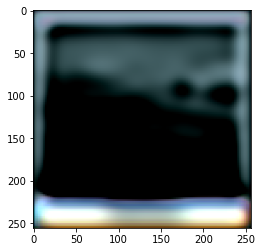

In [ ]:
#since it is a basic model the accuracy of results is not good. 
#Learning from this I implemented a different model that deeper model with pretained weights initially.
image_test = image_loader(test_path)
output = test(image_test,model)
print(output.shape)
output = output.cpu().detach().numpy()
output = output.reshape((3,256,256))
output = output.swapaxes(0,1)
output = output.swapaxes(1,2)

plt.imshow(output)
plt.show()

In [ ]:
#bonus part to change hue
import torchvision.transforms.functional as F
import torchvision.transforms as T
def hue(image):
  hue = 0.0
  R_mean, G_mean ,B_mean = torch.mean(image, dim = [1,2])
  R_mean, G_mean ,B_mean = int(R_mean), int(G_mean) ,int(B_mean)
  max_list = [R_mean,G_mean,B_mean]
  max = max(max_list)
  if max == R_mean:
    hue = -0.1
  elif max == G_mean:
    hue = 0.3
  elif max == B_mean:
    hue = 0.5
  img1 = F.adjust_hue(image, hue)

  # convert the image tensor to PIL image
  img1 = T.ToPILImage()(img1)
  # display the PIL image with adjusted hue
  img1.show()


